
# World Happiness Analysis

### Chen Xinyi, Dong Yunxing, Joseph Fung King Yiu
---

# Problem 2: How to predict Happiness using given factors?

## Import modules
---

In [34]:
import warnings
warnings.filterwarnings("ignore")

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

import statsmodels.formula.api as stats
from statsmodels.formula.api import ols

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# for NN
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



## Import Dataset
---

In [35]:
happinessData = pd.read_excel('data.xls')
print("Number of Countries :", len(happinessData["country"].unique()))
happinessData.head()

Number of Countries : 164


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## 1. Data Preparation 

Take only 6 factors as predictors: GDP, Social Support, Corruption, Life Expectancy, Freedom, Generosity, as these six variables explain almost three quarters of the variation in national annual average ladder score among countries according to the report.

In [36]:
happinessData= happinessData.drop(['GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-15'],axis=1)
happinessData.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620


Now we remove the rows with missing values:

In [37]:
happinessData.isnull().sum()

country                              0
year                                 0
Life Ladder                          0
Log GDP per capita                  27
Social support                      13
Healthy life expectancy at birth     9
Freedom to make life choices        29
Generosity                          80
Perceptions of corruption           90
dtype: int64

In [38]:
happinessData = happinessData.dropna()
print(happinessData.shape)

(1394, 9)


## 2. EDA of the six predictors against Life Ladder 

### 2.1 Standard distributions of the six predictors and life ladder

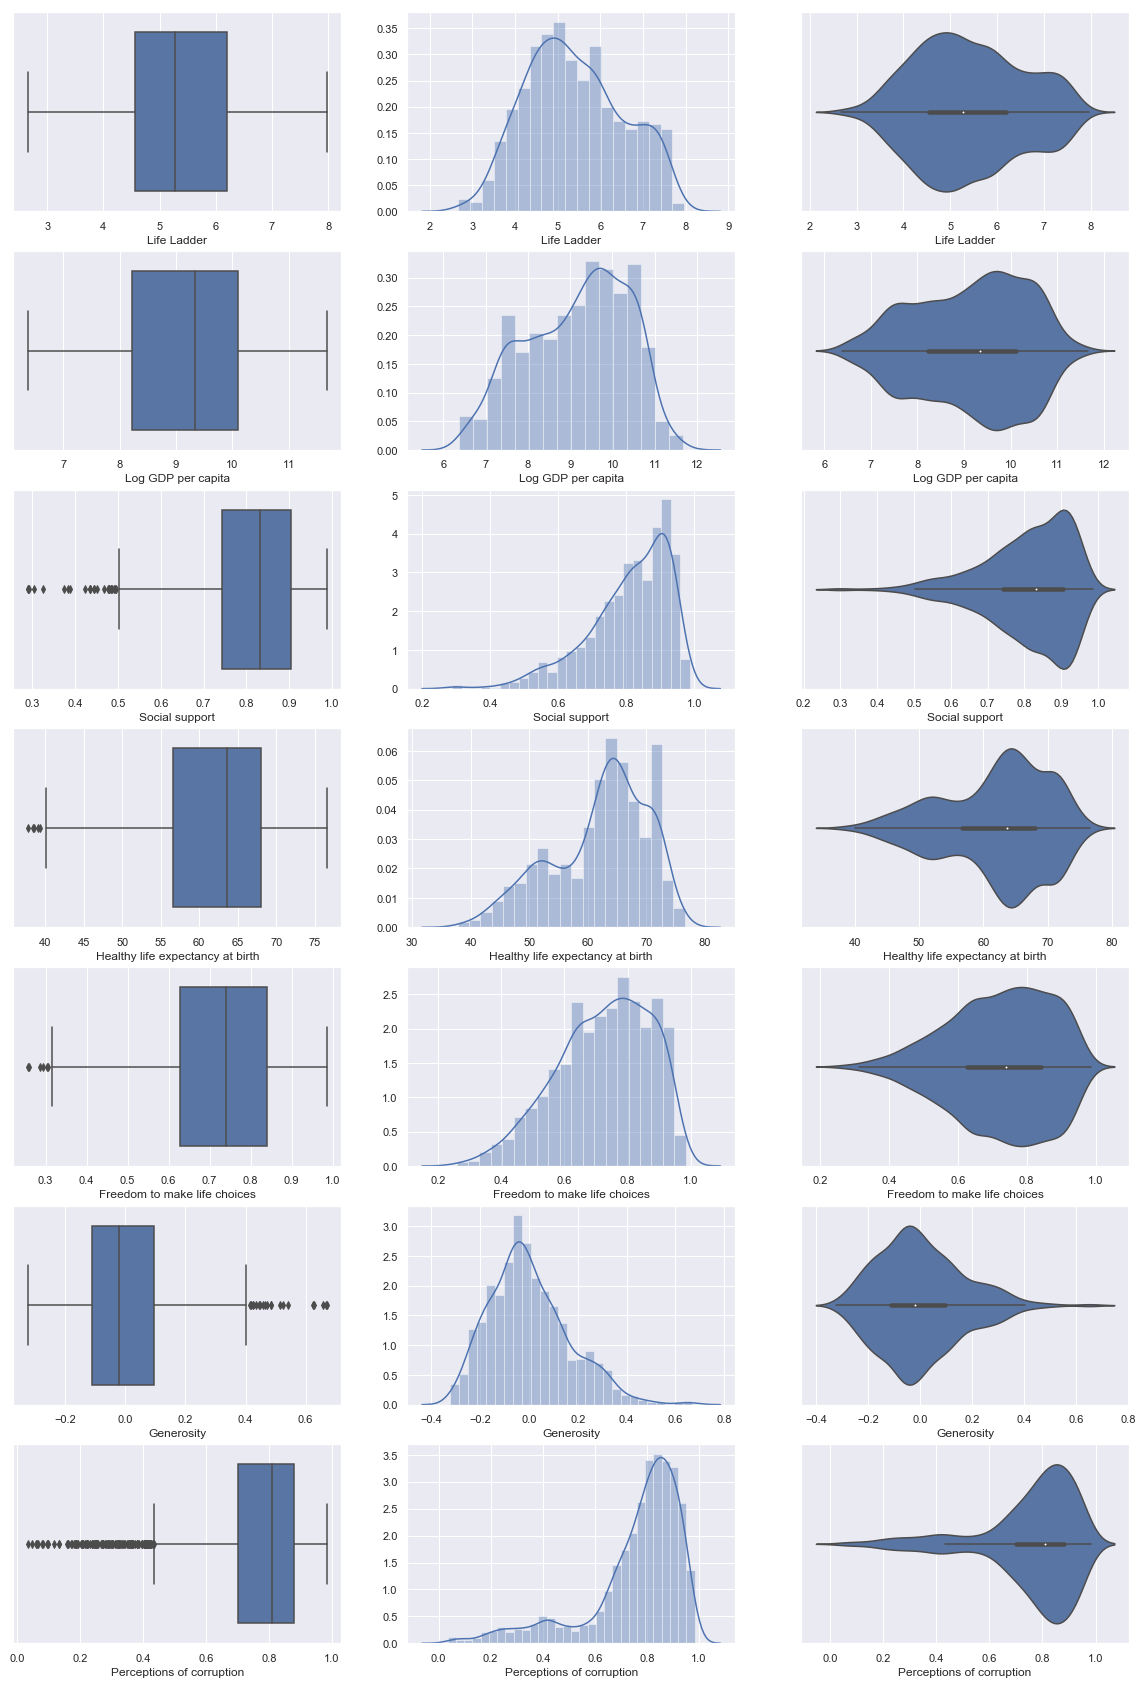

In [39]:
happinessDataVariables = happinessData.iloc[:,2:]


f, axes = plt.subplots(7, 3, figsize=(20, 30))

count = 0
for var in happinessDataVariables:
    sb.boxplot(happinessDataVariables[var], orient = "h", ax=axes[count,0])
    sb.distplot(happinessDataVariables[var], ax = axes[count,1])  
    sb.violinplot(happinessDataVariables[var], ax = axes[count,2])
    count += 1

### 2.2 Correlation among six predictors and life ladder 

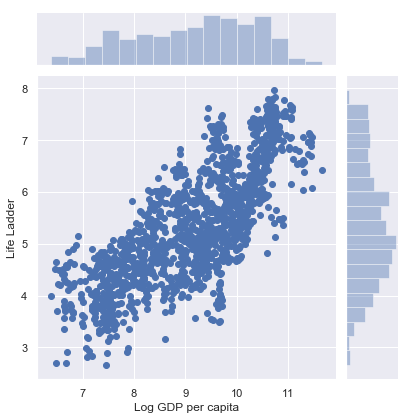

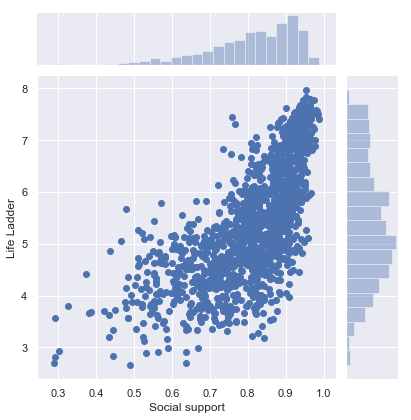

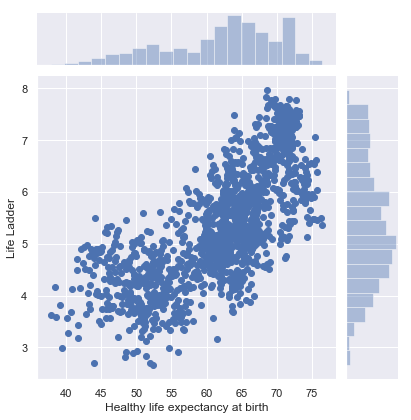

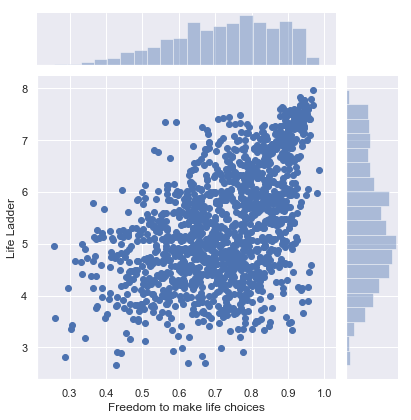

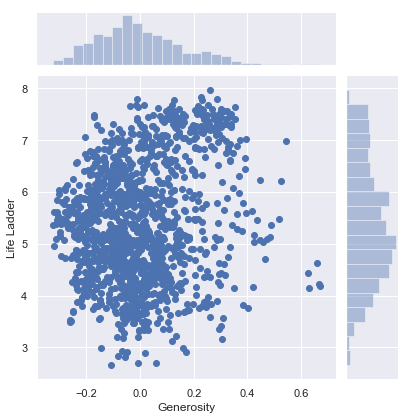

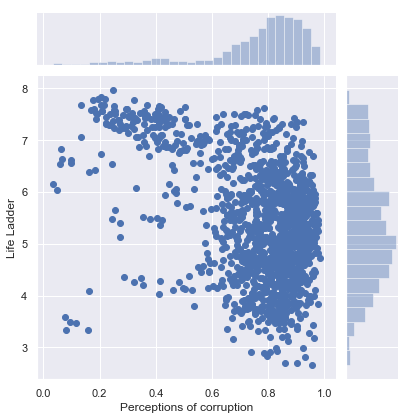

In [40]:
#joint plots of six predictors against life ladder

happinessPredictors = happinessDataVariables.iloc[:,1:]

for var in happinessPredictors:
    sb.jointplot(happinessPredictors[var], happinessData['Life Ladder'], height = 6)

* From the jointplot above, we can see that there is a strong positive linear relationship between GDP and Life Ladder. 
* There seems to be some sort of strong positive linear relationship of Social Support with Life Ladder. 
* The positive linear relationship of Life Expectancy with Life Ladder looks decent.
* There is also a positive linear relationship between Freedom and Life Ladder.
* Compared with all the variables listed above, Generosity has the worst positive linear relationship with Life Ladder.
* There is a negative correlation between perception of Corruption and Life Ladder

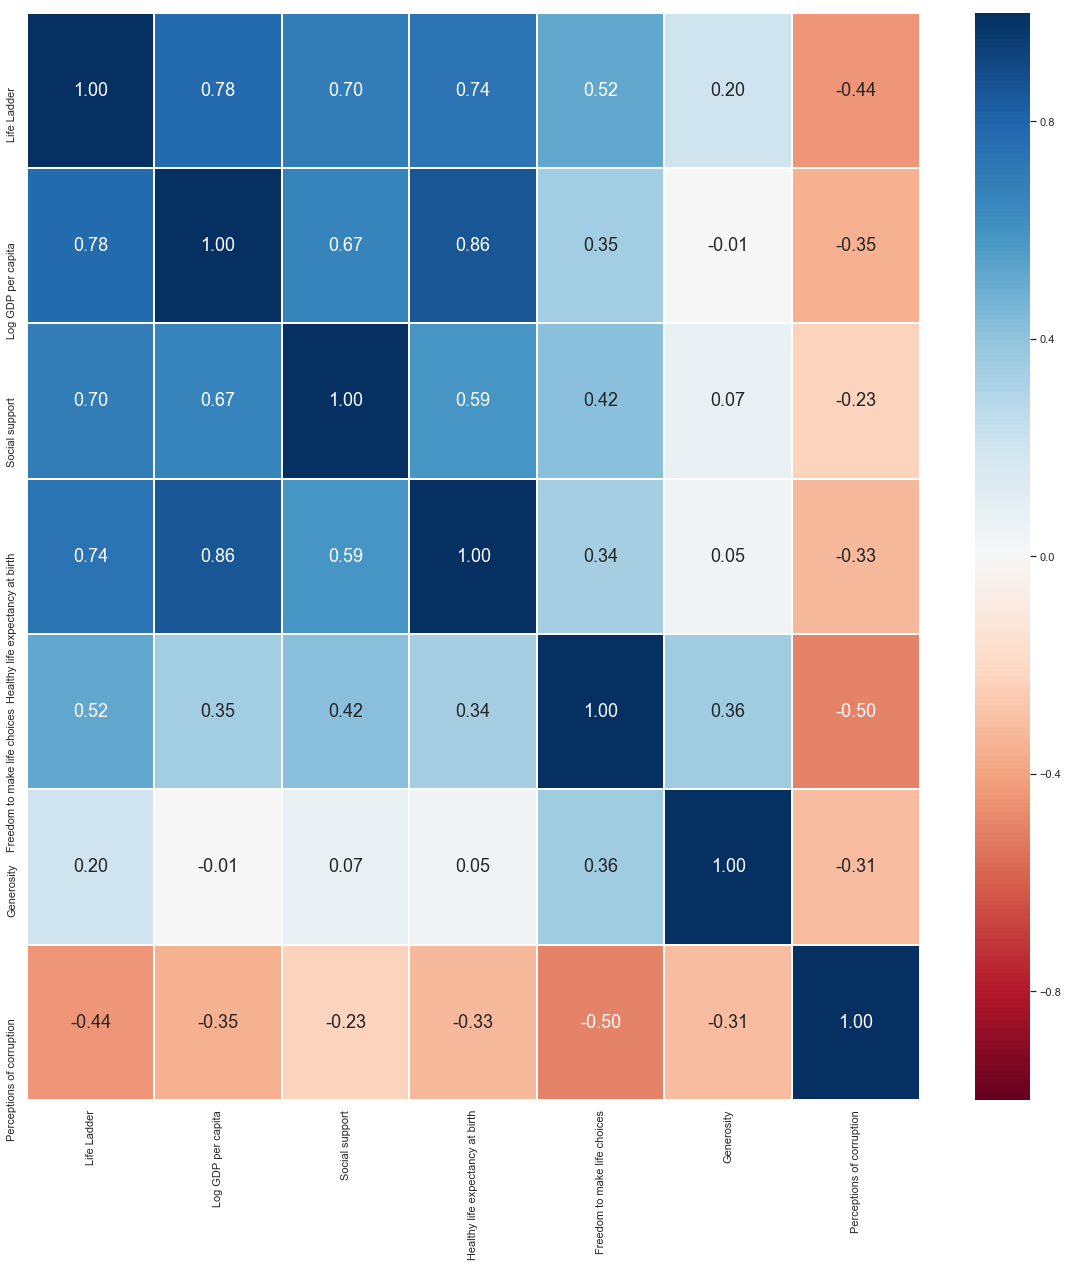

In [41]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(happinessDataVariables.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the heatmap above, we can see that GDP per capita, Social Support,Healthy Life Expectancy at Birth, Freedom to make life choices and Perceptions of Corruption have a very high correlation score with Life Ladder(Happiness).

## 3. Predict happiness score using 6 factors by linear regression

### 3.1 Linear Regression using sklearn 

Intercept of Regression 	: b =  [-1.80504716]
Coefficients of Regression 	: a =  [[ 0.31355811  2.42328762  0.03319157  1.07668968  0.61419046 -0.60982175]]

                         Predictors  Coefficients
0                Log GDP per capita      0.313558
1                    Social support      2.423288
2  Healthy life expectancy at birth      0.033192
3      Freedom to make life choices      1.076690
4                        Generosity      0.614190
5         Perceptions of corruption     -0.609822



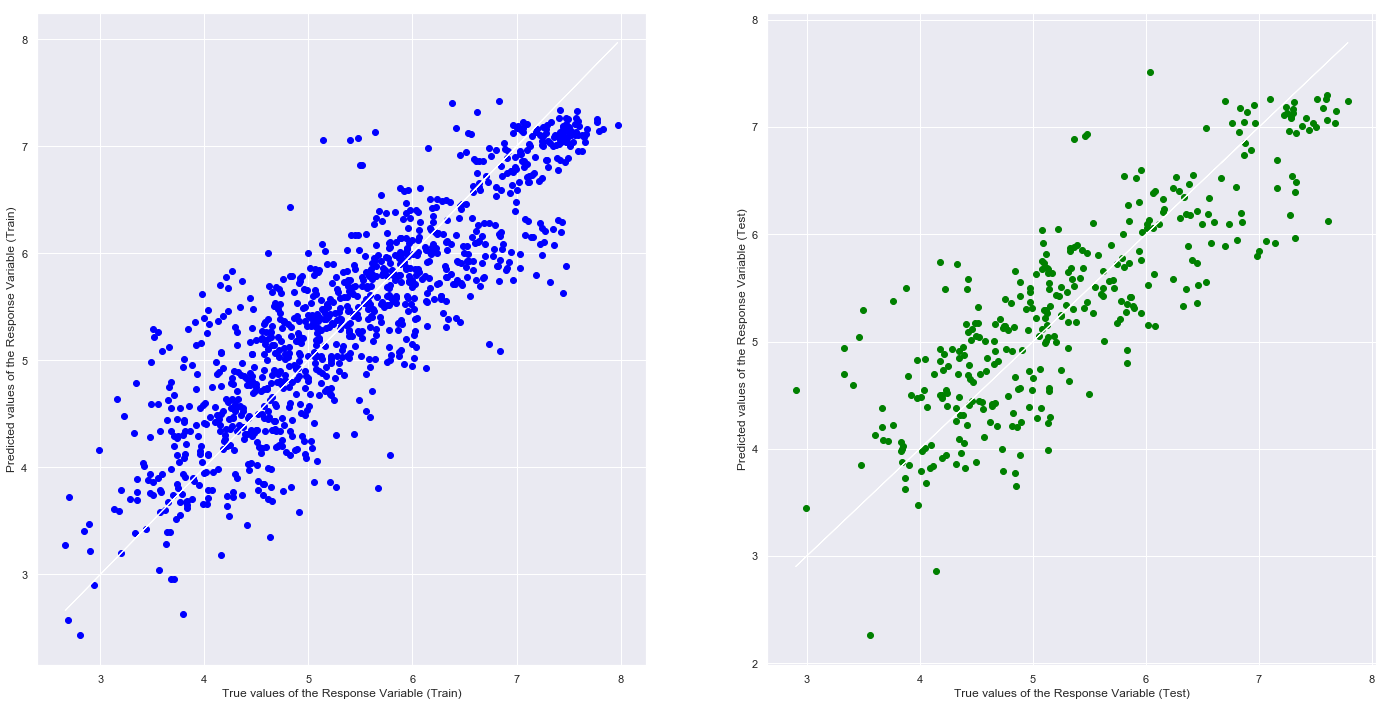

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7455575651396236
Mean Squared Error (MSE) 	: 0.3341592747707762

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7033377136135834
Mean Squared Error (MSE) 	: 0.3485259460003952



In [42]:
y = pd.DataFrame(happinessData['Life Ladder'])
X = pd.DataFrame(happinessPredictors)


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### 3.2 Neural Network Regression 

In [46]:
dataset = happinessDataVariables

Split dataset:

In [47]:
train_dataset = dataset.sample(frac=0.7,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

Dataset Stats:

In [45]:
train_stats = train_dataset.describe()
train_stats.pop("Life Ladder")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,976.0,9.160581,1.173910,6.445492,8.200657,9.317683,10.092605,11.670484
Social support,976.0,0.809364,0.118256,0.290184,0.746279,0.831981,0.903098,0.987343
Healthy life expectancy at birth,976.0,62.005851,8.095521,38.385059,56.756503,63.556843,67.986765,76.536362
Freedom to make life choices,976.0,0.724624,0.143111,0.260069,0.632944,0.735942,0.837668,0.969788
Generosity,976.0,0.000301,0.164151,-0.322952,-0.112546,-0.022373,0.091167,0.669334
Perceptions of corruption,976.0,0.759053,0.179529,0.035198,0.701975,0.811204,0.880346,0.983276


Split labels/target values from dataset:

In [48]:
train_labels = train_dataset.pop("Life Ladder")
test_labels = test_dataset.pop("Life Ladder")

Normalise data:

In [49]:
def norm(x):
      return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Tuning Hyperparameters:

In [50]:
dense_layers = [1,2,3]
layer_sizes = [16,32,64]
learning_rate = [0.01, 0.001, 0.0001]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for lr in learning_rate:
        
            NAME = "{}-nodes-{}-dense-{}-lr".format(layer_size, dense_layer,lr)
            tensorboard = keras.callbacks.TensorBoard(log_dir='logs/{}'.format(NAME))
            early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

            model = keras.Sequential()

            for i in range(dense_layer):
                model.add(keras.layers.Dense(64, activation='relu',input_dim=len(train_dataset.keys())))
                model.add(keras.layers.Dropout(0.5))

            model.add(keras.layers.Dense(1))

            optimizer = tf.keras.optimizers.RMSprop(lr)
            model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error'])
            model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stop,tensorboard])
        
        
        

Train on 780 samples, validate on 196 samples
Epoch 1/100
780/780 [==============================] - 1s 1ms/sample - loss: 8.0115 - mean_absolute_error: 2.3091 - mean_squared_error: 8.0115 - val_loss: 1.3528 - val_mean_absolute_error: 0.9092 - val_mean_squared_error: 1.3528
Epoch 2/100
780/780 [==============================] - 0s 109us/sample - loss: 2.2789 - mean_absolute_error: 1.1894 - mean_squared_error: 2.2789 - val_loss: 0.9291 - val_mean_absolute_error: 0.7550 - val_mean_squared_error: 0.9291
Epoch 3/100
780/780 [==============================] - 0s 101us/sample - loss: 1.7044 - mean_absolute_error: 1.0412 - mean_squared_error: 1.7044 - val_loss: 0.6082 - val_mean_absolute_error: 0.6165 - val_mean_squared_error: 0.6082
Epoch 4/100
780/780 [==============================] - 0s 91us/sample - loss: 1.3956 - mean_absolute_error: 0.9399 - mean_squared_error: 1.3956 - val_loss: 0.6227 - val_mean_absolute_error: 0.6314 - val_mean_squared_error: 0.6227
Epoch 5/100
780/780 [============

780/780 [==============================] - 0s 97us/sample - loss: 0.4534 - mean_absolute_error: 0.5199 - mean_squared_error: 0.4534 - val_loss: 0.3192 - val_mean_absolute_error: 0.4332 - val_mean_squared_error: 0.3192
Epoch 37/100
780/780 [==============================] - 0s 100us/sample - loss: 0.4523 - mean_absolute_error: 0.5316 - mean_squared_error: 0.4523 - val_loss: 0.4071 - val_mean_absolute_error: 0.5132 - val_mean_squared_error: 0.4071
Epoch 38/100
780/780 [==============================] - 0s 90us/sample - loss: 0.4559 - mean_absolute_error: 0.5256 - mean_squared_error: 0.4559 - val_loss: 0.3185 - val_mean_absolute_error: 0.4443 - val_mean_squared_error: 0.3185
Train on 780 samples, validate on 196 samples
Epoch 1/100
780/780 [==============================] - 1s 1ms/sample - loss: 24.7520 - mean_absolute_error: 4.7972 - mean_squared_error: 24.7520 - val_loss: 21.0946 - val_mean_absolute_error: 4.4225 - val_mean_squared_error: 21.0946
Epoch 2/100
780/780 [===================

780/780 [==============================] - 0s 90us/sample - loss: 1.2095 - mean_absolute_error: 0.8731 - mean_squared_error: 1.2095 - val_loss: 0.4221 - val_mean_absolute_error: 0.4932 - val_mean_squared_error: 0.4221
Epoch 34/100
780/780 [==============================] - 0s 102us/sample - loss: 1.1399 - mean_absolute_error: 0.8605 - mean_squared_error: 1.1399 - val_loss: 0.4066 - val_mean_absolute_error: 0.4828 - val_mean_squared_error: 0.4066
Epoch 35/100
780/780 [==============================] - 0s 100us/sample - loss: 1.0870 - mean_absolute_error: 0.8269 - mean_squared_error: 1.0870 - val_loss: 0.3880 - val_mean_absolute_error: 0.4712 - val_mean_squared_error: 0.3880
Epoch 36/100
780/780 [==============================] - 0s 110us/sample - loss: 1.0777 - mean_absolute_error: 0.8224 - mean_squared_error: 1.0777 - val_loss: 0.3950 - val_mean_absolute_error: 0.4756 - val_mean_squared_error: 0.3950
Epoch 37/100
780/780 [==============================] - 0s 106us/sample - loss: 1.1285

780/780 [==============================] - 0s 88us/sample - loss: 0.7268 - mean_absolute_error: 0.6874 - mean_squared_error: 0.7268 - val_loss: 0.3131 - val_mean_absolute_error: 0.4246 - val_mean_squared_error: 0.3131
Epoch 69/100
780/780 [==============================] - 0s 98us/sample - loss: 0.7577 - mean_absolute_error: 0.6900 - mean_squared_error: 0.7577 - val_loss: 0.3238 - val_mean_absolute_error: 0.4312 - val_mean_squared_error: 0.3238
Epoch 70/100
780/780 [==============================] - 0s 87us/sample - loss: 0.7710 - mean_absolute_error: 0.6928 - mean_squared_error: 0.7710 - val_loss: 0.3129 - val_mean_absolute_error: 0.4273 - val_mean_squared_error: 0.3129
Epoch 71/100
780/780 [==============================] - 0s 91us/sample - loss: 0.7835 - mean_absolute_error: 0.6998 - mean_squared_error: 0.7835 - val_loss: 0.3109 - val_mean_absolute_error: 0.4251 - val_mean_squared_error: 0.3109
Epoch 72/100
780/780 [==============================] - 0s 92us/sample - loss: 0.8043 - m

Epoch 26/100
780/780 [==============================] - 0s 98us/sample - loss: 17.9645 - mean_absolute_error: 4.0932 - mean_squared_error: 17.9645 - val_loss: 17.3147 - val_mean_absolute_error: 4.0470 - val_mean_squared_error: 17.3147
Epoch 27/100
780/780 [==============================] - 0s 92us/sample - loss: 17.4683 - mean_absolute_error: 4.0282 - mean_squared_error: 17.4683 - val_loss: 16.8434 - val_mean_absolute_error: 3.9891 - val_mean_squared_error: 16.8434
Epoch 28/100
780/780 [==============================] - 0s 92us/sample - loss: 17.2555 - mean_absolute_error: 3.9899 - mean_squared_error: 17.2555 - val_loss: 16.3739 - val_mean_absolute_error: 3.9308 - val_mean_squared_error: 16.3739
Epoch 29/100
780/780 [==============================] - 0s 91us/sample - loss: 16.3784 - mean_absolute_error: 3.8949 - mean_squared_error: 16.3784 - val_loss: 15.9178 - val_mean_absolute_error: 3.8730 - val_mean_squared_error: 15.9178
Epoch 30/100
780/780 [==============================] - 0s 9

780/780 [==============================] - 0s 87us/sample - loss: 5.9928 - mean_absolute_error: 2.1474 - mean_squared_error: 5.9928 - val_loss: 4.9126 - val_mean_absolute_error: 1.9688 - val_mean_squared_error: 4.9126
Epoch 62/100
780/780 [==============================] - 0s 86us/sample - loss: 5.9387 - mean_absolute_error: 2.1080 - mean_squared_error: 5.9387 - val_loss: 4.7080 - val_mean_absolute_error: 1.9157 - val_mean_squared_error: 4.7080
Epoch 63/100
780/780 [==============================] - 0s 88us/sample - loss: 5.7634 - mean_absolute_error: 2.0896 - mean_squared_error: 5.7634 - val_loss: 4.5064 - val_mean_absolute_error: 1.8621 - val_mean_squared_error: 4.5064
Epoch 64/100
780/780 [==============================] - 0s 86us/sample - loss: 5.4033 - mean_absolute_error: 1.9840 - mean_squared_error: 5.4033 - val_loss: 4.3117 - val_mean_absolute_error: 1.8091 - val_mean_squared_error: 4.3117
Epoch 65/100
780/780 [==============================] - 0s 89us/sample - loss: 5.2139 - m

780/780 [==============================] - 0s 84us/sample - loss: 3.2343 - mean_absolute_error: 1.4708 - mean_squared_error: 3.2343 - val_loss: 1.7148 - val_mean_absolute_error: 1.0652 - val_mean_squared_error: 1.7148
Epoch 97/100
780/780 [==============================] - 0s 86us/sample - loss: 3.3527 - mean_absolute_error: 1.5032 - mean_squared_error: 3.3527 - val_loss: 1.6750 - val_mean_absolute_error: 1.0547 - val_mean_squared_error: 1.6750
Epoch 98/100
780/780 [==============================] - 0s 85us/sample - loss: 3.2190 - mean_absolute_error: 1.4735 - mean_squared_error: 3.2190 - val_loss: 1.6468 - val_mean_absolute_error: 1.0457 - val_mean_squared_error: 1.6468
Epoch 99/100
780/780 [==============================] - 0s 89us/sample - loss: 3.1896 - mean_absolute_error: 1.4622 - mean_squared_error: 3.1896 - val_loss: 1.6233 - val_mean_absolute_error: 1.0374 - val_mean_squared_error: 1.6233
Epoch 100/100
780/780 [==============================] - 0s 88us/sample - loss: 2.9018 - 

780/780 [==============================] - 0s 113us/sample - loss: 2.1484 - mean_absolute_error: 1.1528 - mean_squared_error: 2.1484 - val_loss: 0.9215 - val_mean_absolute_error: 0.7504 - val_mean_squared_error: 0.9215
Epoch 17/100
780/780 [==============================] - 0s 90us/sample - loss: 2.0526 - mean_absolute_error: 1.1367 - mean_squared_error: 2.0526 - val_loss: 0.8458 - val_mean_absolute_error: 0.7167 - val_mean_squared_error: 0.8458
Epoch 18/100
780/780 [==============================] - 0s 88us/sample - loss: 1.9876 - mean_absolute_error: 1.1263 - mean_squared_error: 1.9876 - val_loss: 0.7911 - val_mean_absolute_error: 0.6953 - val_mean_squared_error: 0.7911
Epoch 19/100
780/780 [==============================] - 0s 88us/sample - loss: 1.8682 - mean_absolute_error: 1.0764 - mean_squared_error: 1.8682 - val_loss: 0.7784 - val_mean_absolute_error: 0.6948 - val_mean_squared_error: 0.7784
Epoch 20/100
780/780 [==============================] - 0s 86us/sample - loss: 1.8959 - 

780/780 [==============================] - 0s 88us/sample - loss: 1.0354 - mean_absolute_error: 0.8052 - mean_squared_error: 1.0354 - val_loss: 0.3127 - val_mean_absolute_error: 0.4261 - val_mean_squared_error: 0.3127
Epoch 52/100
780/780 [==============================] - 0s 87us/sample - loss: 0.9356 - mean_absolute_error: 0.7779 - mean_squared_error: 0.9356 - val_loss: 0.3075 - val_mean_absolute_error: 0.4244 - val_mean_squared_error: 0.3075
Epoch 53/100
780/780 [==============================] - 0s 104us/sample - loss: 0.9739 - mean_absolute_error: 0.7820 - mean_squared_error: 0.9739 - val_loss: 0.3218 - val_mean_absolute_error: 0.4322 - val_mean_squared_error: 0.3218
Epoch 54/100
780/780 [==============================] - 0s 97us/sample - loss: 0.9448 - mean_absolute_error: 0.7751 - mean_squared_error: 0.9448 - val_loss: 0.3179 - val_mean_absolute_error: 0.4289 - val_mean_squared_error: 0.3179
Epoch 55/100
780/780 [==============================] - 0s 82us/sample - loss: 0.9785 - 

780/780 [==============================] - 0s 90us/sample - loss: 20.7070 - mean_absolute_error: 4.4378 - mean_squared_error: 20.7070 - val_loss: 20.4899 - val_mean_absolute_error: 4.4366 - val_mean_squared_error: 20.4899
Epoch 14/100
780/780 [==============================] - 0s 91us/sample - loss: 20.3592 - mean_absolute_error: 4.3981 - mean_squared_error: 20.3592 - val_loss: 19.9473 - val_mean_absolute_error: 4.3767 - val_mean_squared_error: 19.9473
Epoch 15/100
780/780 [==============================] - 0s 92us/sample - loss: 19.8497 - mean_absolute_error: 4.3402 - mean_squared_error: 19.8497 - val_loss: 19.4172 - val_mean_absolute_error: 4.3168 - val_mean_squared_error: 19.4172
Epoch 16/100
780/780 [==============================] - 0s 92us/sample - loss: 19.0672 - mean_absolute_error: 4.2431 - mean_squared_error: 19.0672 - val_loss: 18.8838 - val_mean_absolute_error: 4.2560 - val_mean_squared_error: 18.8838
Epoch 17/100
780/780 [==============================] - 0s 92us/sample - 

780/780 [==============================] - 0s 96us/sample - loss: 6.3383 - mean_absolute_error: 2.2340 - mean_squared_error: 6.3383 - val_loss: 5.5149 - val_mean_absolute_error: 2.1113 - val_mean_squared_error: 5.5149
Epoch 49/100
780/780 [==============================] - 0s 98us/sample - loss: 5.9326 - mean_absolute_error: 2.1320 - mean_squared_error: 5.9326 - val_loss: 5.2563 - val_mean_absolute_error: 2.0467 - val_mean_squared_error: 5.2563
Epoch 50/100
780/780 [==============================] - 0s 98us/sample - loss: 5.9933 - mean_absolute_error: 2.1453 - mean_squared_error: 5.9933 - val_loss: 5.0177 - val_mean_absolute_error: 1.9858 - val_mean_squared_error: 5.0177
Epoch 51/100
780/780 [==============================] - 0s 96us/sample - loss: 5.7828 - mean_absolute_error: 2.0991 - mean_squared_error: 5.7828 - val_loss: 4.7880 - val_mean_absolute_error: 1.9256 - val_mean_squared_error: 4.7880
Epoch 52/100
780/780 [==============================] - 0s 97us/sample - loss: 5.4890 - m

704/780 [==========================>...] - ETA: 0s - loss: 2.6655 - mean_absolute_error: 1.3397 - mean_squared_error: 2.66

KeyboardInterrupt: 

After viewing the results on Tensorboard, we observed that a model with zero hidden layer and input layer of 64 nodes gives the lowest validation error. We will build this model below.

In [51]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model = keras.Sequential()

model.add(keras.layers.Dense(64, activation='relu',input_dim=len(train_dataset.keys())))
model.add(keras.layers.Dense(1))

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_squared_error',optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error'])
model.fit(normed_train_data, train_labels, epochs=100, validation_split=0.2, callbacks=[early_stop])

Train on 780 samples, validate on 196 samples
Epoch 1/100
780/780 [==============================] - 1s 1ms/sample - loss: 24.0357 - mean_absolute_error: 4.7660 - mean_squared_error: 24.0357 - val_loss: 20.4765 - val_mean_absolute_error: 4.3644 - val_mean_squared_error: 20.4765
Epoch 2/100
780/780 [==============================] - 0s 81us/sample - loss: 17.8902 - mean_absolute_error: 4.0535 - mean_squared_error: 17.8902 - val_loss: 15.4494 - val_mean_absolute_error: 3.7139 - val_mean_squared_error: 15.4494
Epoch 3/100
780/780 [==============================] - 0s 82us/sample - loss: 13.1672 - mean_absolute_error: 3.3968 - mean_squared_error: 13.1672 - val_loss: 11.2724 - val_mean_absolute_error: 3.0947 - val_mean_squared_error: 11.2724
Epoch 4/100
780/780 [==============================] - 0s 79us/sample - loss: 9.3082 - mean_absolute_error: 2.7742 - mean_squared_error: 9.3082 - val_loss: 7.8233 - val_mean_absolute_error: 2.4971 - val_mean_squared_error: 7.8233
Epoch 5/100
780/780 [==

780/780 [==============================] - 0s 82us/sample - loss: 0.2869 - mean_absolute_error: 0.4259 - mean_squared_error: 0.2869 - val_loss: 0.3425 - val_mean_absolute_error: 0.4624 - val_mean_squared_error: 0.3425
Epoch 37/100
780/780 [==============================] - 0s 78us/sample - loss: 0.2826 - mean_absolute_error: 0.4211 - mean_squared_error: 0.2826 - val_loss: 0.3202 - val_mean_absolute_error: 0.4470 - val_mean_squared_error: 0.3202
Epoch 38/100
780/780 [==============================] - 0s 90us/sample - loss: 0.2805 - mean_absolute_error: 0.4192 - mean_squared_error: 0.2805 - val_loss: 0.3179 - val_mean_absolute_error: 0.4438 - val_mean_squared_error: 0.3179
Epoch 39/100
780/780 [==============================] - 0s 84us/sample - loss: 0.2757 - mean_absolute_error: 0.4178 - mean_squared_error: 0.2757 - val_loss: 0.3178 - val_mean_absolute_error: 0.4483 - val_mean_squared_error: 0.3178
Epoch 40/100
780/780 [==============================] - 0s 93us/sample - loss: 0.2736 - m

780/780 [==============================] - 0s 75us/sample - loss: 0.2312 - mean_absolute_error: 0.3795 - mean_squared_error: 0.2312 - val_loss: 0.2925 - val_mean_absolute_error: 0.4245 - val_mean_squared_error: 0.2925
Epoch 72/100
780/780 [==============================] - 0s 75us/sample - loss: 0.2324 - mean_absolute_error: 0.3819 - mean_squared_error: 0.2324 - val_loss: 0.2898 - val_mean_absolute_error: 0.4241 - val_mean_squared_error: 0.2898
Epoch 73/100
780/780 [==============================] - 0s 75us/sample - loss: 0.2302 - mean_absolute_error: 0.3795 - mean_squared_error: 0.2302 - val_loss: 0.2856 - val_mean_absolute_error: 0.4185 - val_mean_squared_error: 0.2856
Epoch 74/100
780/780 [==============================] - 0s 78us/sample - loss: 0.2315 - mean_absolute_error: 0.3814 - mean_squared_error: 0.2315 - val_loss: 0.3022 - val_mean_absolute_error: 0.4345 - val_mean_squared_error: 0.3022
Epoch 75/100
780/780 [==============================] - 0s 75us/sample - loss: 0.2316 - m

Test model with test dataset:

In [52]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean s Error: {:5.2f} Life Ladder".format(mse))

Testing set Mean s Error:  0.31 Life Ladder


(2.5825242743269943, 8.026949907801912, 2.9064884719996, 8.350914105474518)

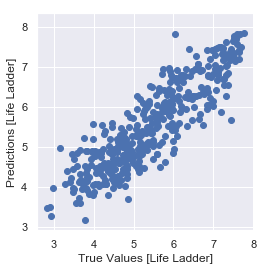

In [53]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Life Ladder]')
plt.ylabel('Predictions [Life Ladder]')
plt.axis('equal')
plt.axis('square')

### 3.3 Random Forest Regression 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9775545351979119
Mean Squared Error (MSE) 	: 0.028873812730570513

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8474122091128322
Mean Squared Error (MSE) 	: 0.19270369921285774



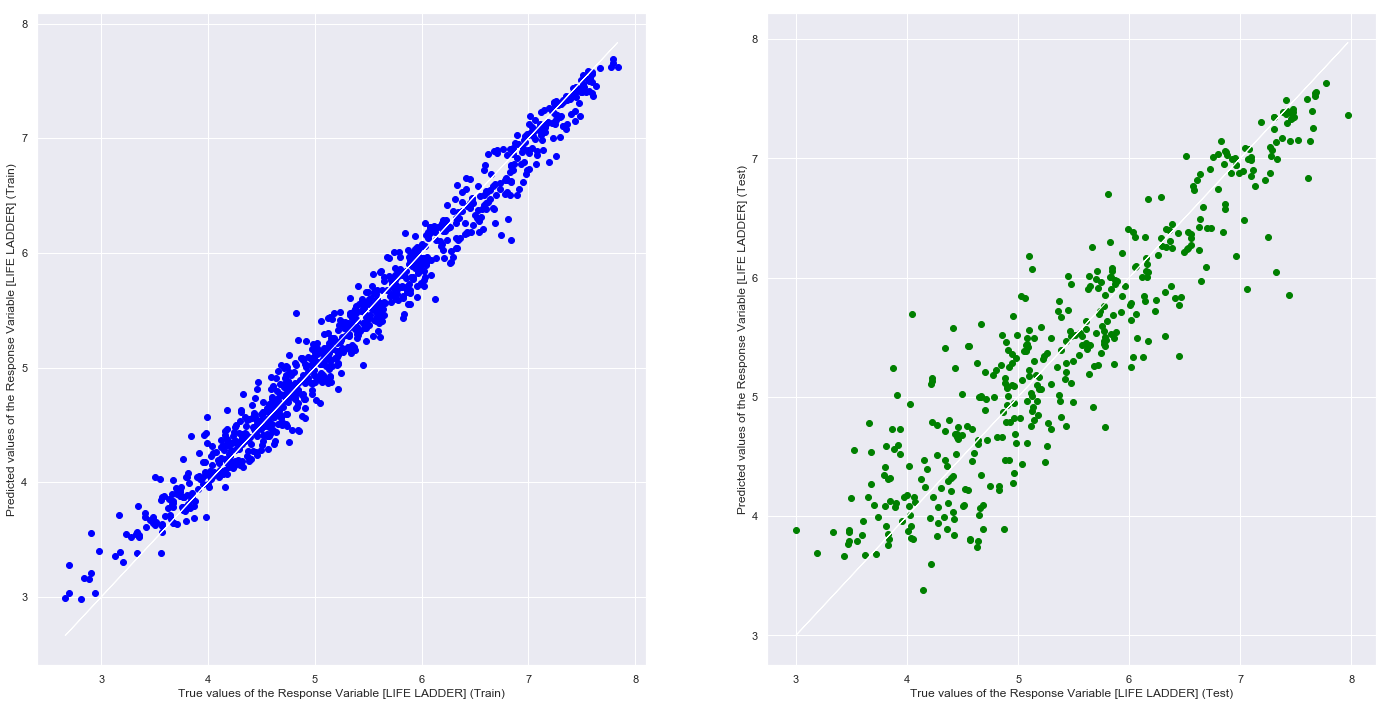

In [54]:
# Recall the PREDICTORS-LIFE LADDER Dataset
happiness = pd.DataFrame(happinessData['Life Ladder'])   # Response
predictors = pd.DataFrame(happinessPredictors)         # Predictor

#Data Normalization
ss = StandardScaler()
ss.fit_transform(predictors)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictors, happiness, test_size = 0.3,random_state = 15) # predictor first than response

#Create a Random Forest Regressor
clf=RandomForestRegressor(n_estimators=220,max_depth=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predict Life Ladder values corresponding to the 6 factors
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", clf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable [LIFE LADDER] (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable [LIFE LADDER] (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable [LIFE LADDER] (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable [LIFE LADDER] (Test)")
plt.show()

### Conclusion: 

Among the three models we tried, the random forest regression yields the lowest MSE and highest Explained Variance for the test dataset. Hence, we conclude that random forest is the best model for predicting happiness scores using these six factors. 

## 4. Use random forest regression to predict 2018 happiness score 

We will use the dataset from World Happiness Report 2019 which contains the values of 6 predictors and the true 2018 happiness score. We are going to take the 6 predictors in 2018 and use our random forest model to predict the 2018 happiness score and compare the predicted values and the actual values.

In [55]:
happinessData2018 = pd.read_excel('2018.xls')
happinessData2018.head()
happinessData2018= happinessData2018.drop(['GINI index (World Bank estimate)','gini of household income reported in Gallup, by wp5-year','Positive affect','Negative affect','Confidence in national government','Democratic Quality','Delivery Quality','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-16', 
                                           'Most people can be trusted, Gallup','Most people can be trusted, WVS round 1981-1984','Most people can be trusted, WVS round 1989-1993','Most people can be trusted, WVS round 1994-1998','Most people can be trusted, WVS round 1999-2004','Most people can be trusted, WVS round 2005-2009','Most people can be trusted, WVS round 2010-2014'],axis=1)

happinessData2018 = happinessData2018.dropna()

In [56]:
#get the data for 2018
happinessData2018 = happinessData2018.loc[happinessData2018['Year'] == 2018]

In [57]:
happinessData2018 = happinessData2018.drop(['Country name', 'Year'], axis =1)
happinessData2018.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
10,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606
21,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129
28,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704
45,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255
58,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826


In [58]:
test_label = happinessData2018.pop('Life Ladder')

In [59]:
test_data = pd.DataFrame(happinessData2018)
test_pred = clf.predict(test_data)

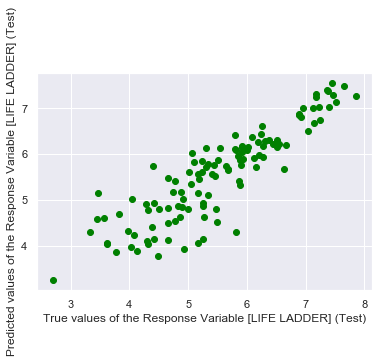

In [60]:
plt.figure()
plt.scatter(test_label ,test_pred, color = "green")
plt.xlabel("True values of the Response Variable [LIFE LADDER] (Test)")
plt.ylabel("Predicted values of the Response Variable [LIFE LADDER] (Test)")
plt.show()

In [61]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", clf.score(test_data,test_label))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_label ,test_pred))
print()

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7830746369870101
Mean Squared Error (MSE) 	: 0.2654474404852324

